In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("loan_data_set.csv")

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

et us group the quantitative variables 'ApplicantIncome', 'Coapplicant Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History' by 'Loan_Status' categorical variable

In [12]:
df["ApplicantIncome"].fillna(df["ApplicantIncome"].mean(), inplace=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

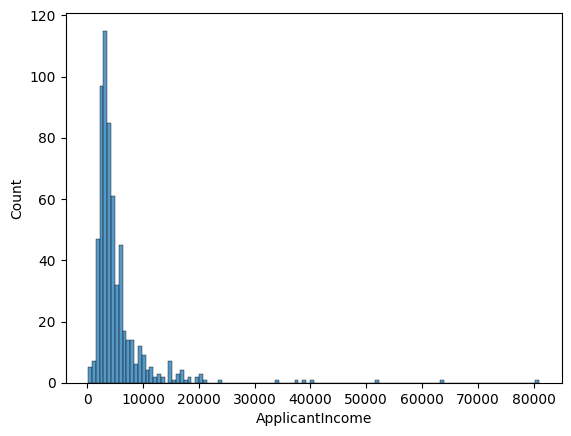

In [13]:
sns.histplot(data=df, x='ApplicantIncome')

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

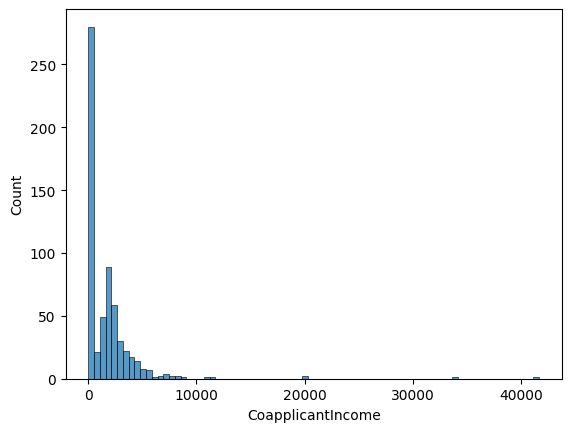

In [14]:

df["CoapplicantIncome"].fillna(df["CoapplicantIncome"].mean(), inplace=True)
sns.histplot(data=df, x='CoapplicantIncome')

In [15]:
df["Credit_History"].fillna(np.random.randint(0,2), inplace=True)

In [16]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)

In [17]:
grouped_df = df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History"]].groupby(df["Loan_Status"])

In [18]:
mean = grouped_df.mean()
mean

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,5446.078125,1877.807292,150.945488,0.505208
Y,5384.068720,1504.516398,144.349606,0.895735


In [19]:
median = grouped_df.median()
median

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,3833.5,268.0,133.5,1.0
Y,3812.5,1239.5,128.0,1.0


In [20]:
min = grouped_df.min()
min

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,150,0.0,9.0,0.0
Y,210,0.0,17.0,0.0


In [21]:
max = grouped_df.max()
max

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,81000,41667.0,570.0,1.0
Y,63337,20000.0,700.0,1.0


In [22]:
std = grouped_df.std()
std

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
N,6819.558528,4384.060103,83.361163,0.501280
Y,5765.441615,1924.754855,84.361109,0.305967
